In [195]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import seaborn as sns


Here we have downloaded a dataset from this link in 

kaggle:https://www.kaggle.com/code/yasirakyzl/covid-19-ml-model-90-accuracy/data . Our goal as part of this project is to design an algorithm to predict the risk of a patient dying from Covid based on their medical data and history.

In [196]:
df = pd.read_csv("covidData.csv");

In the Dataset that we are using the column date died contains the dates at which the patient had died. If the patient is still alive then the Date_Died column contains the value '9999-99-99'. So in this step we are converting the date_died column into a binary column with 1(dead) and 0(alive) as the possible values.

In [197]:
# df = df.replace(to_replace=97, value=np.nan).dropna()
# df = df.replace(to_replace=99, value=np.nan).dropna()

df['DEATH'] = np.where(df['DATE_DIED'] == '9999-99-99', 0, 1)
df = df.drop('DATE_DIED', axis=1)

Next we split the dataset into training and test data.

In [198]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="DEATH")
y = df["DEATH"]

Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.2,random_state=42)
print("Train x :",Xtr.shape)
print("Test x :",Xts.shape)
print("Train y :",ytr.shape)
print("Test y :",yts.shape)

X

Train x : (838860, 20)
Test x : (209715, 20)
Train y : (838860,)
Test y : (209715,)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


Now we create a linear regresion model on the dataset and check its accuracy

In [199]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(Xtr,ytr)
print("Linear Regression Accuracy :",linreg.score(Xts, yts))

Linear Regression Accuracy : 0.30115335137646615


You can see that the accuracy obtained for linear regression is very low. This is because our problem is a classification problem and not a regression problem. So we instead we use logistic regression to create our model.

In [201]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtr,ytr)
print("Logistic Regression Accuracy :",logreg.score(Xts, yts))

Logistic Regression Accuracy : 0.9356889111413108


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We now how our prediction algorithm performs if we use a Decison Tree instead of logistic Regression

In [202]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(Xtr,ytr)
print("Decision Tree :",dt.score(Xts, yts))

Decision Tree : 0.9398278616217247


We notice that the model using the decision tree performs better than logistic regression this because our dataset is large . Furthermore logistic regression works best only for simple datasets which are small and linearly seperable. For larger datasets more complex models are generally preferred. We will next see how welldoes  the random forest model which makes use of multiple decision trees work on this dataset.

In [203]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtr,ytr)
print("Random forrest Accuracy :",rf.score(Xts, yts))

Random forrest Accuracy : 0.9447822044202847


We will see how well a prediction algorithm using a nueral network works on the test data. For the neural network which we have built. We are using an input layer a hiden layer and an output layer. Since there are 20 input features in our dataset we are using (2*20 -1) hidden units(neurons) in each hidden layer. 1 output unit the number of epochs is 30. The activation function chosen is relu for the hidden layers and sigmoid for the output layer. We chose these hyperparameters after reading this article https://medium.com/codex/how-to-tune-hyperparameters-for-better-neural-network-performance-b8f542855d2e on medium.

In [204]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation

nin = Xtr.shape[1] 
nh = 39    
nout = 1   
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='relu', name='hidden'))
model.add(Dense(units=nh, activation='relu', name='hidden2'))
model.add(Dense(units=nout, activation='sigmoid', name='output'))



In [207]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [208]:
hist = model.fit(Xtr, ytr, epochs=30, batch_size=100, validation_data=(Xts,yts))

Epoch 1/30
8389/8389 [==============================] - 22s 2ms/step - loss: 0.1434 - accuracy: 0.9379 - val_loss: 0.1290 - val_accuracy: 0.9452
Epoch 2/30
8389/8389 [==============================] - 22s 3ms/step - loss: 0.1260 - accuracy: 0.9457 - val_loss: 0.1203 - val_accuracy: 0.9483
Epoch 3/30
8389/8389 [==============================] - 21s 2ms/step - loss: 0.1217 - accuracy: 0.9473 - val_loss: 0.1192 - val_accuracy: 0.9478
Epoch 4/30
8389/8389 [==============================] - 22s 3ms/step - loss: 0.1200 - accuracy: 0.9476 - val_loss: 0.1196 - val_accuracy: 0.9495
Epoch 5/30
8389/8389 [==============================] - 22s 3ms/step - loss: 0.1189 - accuracy: 0.9482 - val_loss: 0.1195 - val_accuracy: 0.9481
Epoch 6/30
8389/8389 [==============================] - 21s 3ms/step - loss: 0.1183 - accuracy: 0.9484 - val_loss: 0.1198 - val_accuracy: 0.9485
Epoch 7/30
8389/8389 [==============================] - 21s 2ms/step - loss: 0.1179 - accuracy: 0.9486 - val_loss: 0.1181 - val_ac

In [209]:
score, acc = model.evaluate(Xts, yts)
print('Test accuracy:', acc)

6554/6554 [==============================] - 10s 2ms/step - loss: 0.1145 - accuracy: 0.9500
Test accuracy: 0.9500464797019958


We have run all our models . However we can still improve the accuracy by doing some feature selection to remove some irrelevant features which might be reducing the accuracy of our model. Furthermore our dataset contains some values which are actually null values which migth be affecting our overall result. In the dataset we used the null values are 97 and 99.


In [210]:
q1=df.columns
q1

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')

Before any feature selection is done we see the count of the unique values for each feature in the dataset.

In [211]:
df['USMER'].value_counts()

2    662903
1    385672
Name: USMER, dtype: int64

In [212]:
df['MEDICAL_UNIT'].value_counts()

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

In [213]:
df['SEX'].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [214]:
df['PATIENT_TYPE'].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

In [215]:
df['INTUBED'].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [216]:
df['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [217]:
df['AGE'].value_counts()

30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64

In [218]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [219]:
df['DIABETES'].value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

In [220]:
df['COPD'].value_counts()

2     1030510
1       15062
98       3003
Name: COPD, dtype: int64

In [221]:
df['ASTHMA'].value_counts()

2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64

In [222]:
df['INMSUPR'].value_counts()

2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64

In [223]:
df['HIPERTENSION'].value_counts()

2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64

In [224]:
df['OTHER_DISEASE'].value_counts()

2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64

In [225]:
df['CARDIOVASCULAR'].value_counts()

2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64

In [226]:
df['OBESITY'].value_counts()

2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64

In [227]:
df['RENAL_CHRONIC'].value_counts()

2     1026665
1       18904
98       3006
Name: RENAL_CHRONIC, dtype: int64

In [228]:
df['TOBACCO'].value_counts()

2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [229]:
df['CLASIFFICATION_FINAL'].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [230]:
df['ICU'].value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

We notice that the features INTUBED and ICU have more than 50% of the data as null(value is 97 or 99). So we cant simply remove all rows having atleast one feature having 97 or 99 in the dataset as we wil end up losing a lot of data. However since both INTUBED and ICU are binary attributes we can use logistic regression to fill the null value in INTUBED and ICU. After this done we can delete all the rows having null values in atleast one feature. For dealing with situation above we made use of a similar technique found in https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/.

In [231]:
from numpy.ma.core import filled
df_mod = df
df_mod= df.loc[(df['ICU'] != 97) & (df['ICU'] != 99)]

df_to_fill = df.loc[(df['ICU'] == 99) | (df['ICU'] == 97)]


from sklearn.linear_model import LogisticRegression
X_mod = df_mod.loc[:, df.columns != 'ICU']
y_mod = df_mod['ICU']

logreg = LogisticRegression()
logreg.fit(X_mod, y_mod)




df_to_fill['ICU']  = logreg.predict(df_to_fill.loc[:, df.columns != 'ICU'])


filled_df = df_to_fill.append(df_mod)

df = filled_df

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-231-3cf56cb4e357>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_fill['ICU']  = logreg.predict(df_to_fill.loc[:, df.columns != 'ICU'])


In [232]:
from numpy.ma.core import filled
df_mod_int = df.loc[(df['INTUBED'] != 97) & (df['INTUBED'] != 99)]

df_to_fill_int = df.loc[(df['INTUBED'] == 99) | (df['INTUBED'] == 97)]


from sklearn.linear_model import LogisticRegression
X_mod = df_mod_int.loc[:, df.columns != 'INTUBED']
y_mod = df_mod_int['INTUBED']

logreg = LogisticRegression()
logreg.fit(X_mod, y_mod)




df_to_fill_int['INTUBED']  = logreg.predict(df_to_fill_int.loc[:, df.columns != 'INTUBED'])


filled_df_int = df_to_fill_int.append(df_mod_int)

df =filled_df_int


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-232-838cdcc7955c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_fill_int['INTUBED']  = logreg.predict(df_to_fill_int.loc[:, df.columns != 'INTUBED'])


In [233]:
df = df.replace(to_replace=97, value=np.nan).dropna()
df = df.replace(to_replace=99, value=np.nan).dropna()
X = df.drop(columns="DEATH")
y = df["DEATH"]

Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.2,random_state=42)
print("Train x :",Xtr.shape)
print("Test x :",Xts.shape)
print("Train y :",ytr.shape)
print("Test y :",yts.shape)

Train x : (413040, 20)
Test x : (103260, 20)
Train y : (413040,)
Test y : (103260,)


Now we proceed with the feature selection. We use an extra tree classifier to get the feature importance of each of the features and select the 10 most important features. We learnt about this method from this link in medium https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[0.00989687 0.04671262 0.         0.17069635 0.18607499 0.1056548
 0.285999   0.0028607  0.02020884 0.00873535 0.00613554 0.00871777
 0.02021294 0.01201643 0.01011423 0.01704982 0.01135474 0.00888319
 0.05568645 0.01298938]


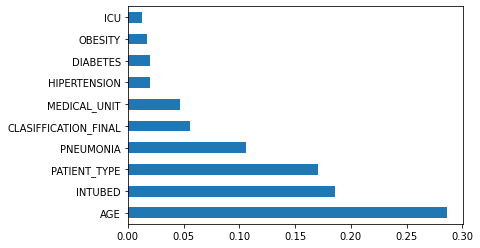

In [234]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

etc = ExtraTreesClassifier()
etc.fit(Xtr,ytr)
print(etc.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(etc.feature_importances_, index=Xtr.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [235]:
feature_list=feat_importances.nlargest(10)
feature_list

AGE                     0.285999
INTUBED                 0.186075
PATIENT_TYPE            0.170696
PNEUMONIA               0.105655
CLASIFFICATION_FINAL    0.055686
MEDICAL_UNIT            0.046713
HIPERTENSION            0.020213
DIABETES                0.020209
OBESITY                 0.017050
ICU                     0.012989
dtype: float64

In [236]:
fselect=['AGE','PATIENT_TYPE','INTUBED','CLASIFFICATION_FINAL','MEDICAL_UNIT','PNEUMONIA','ICU','DIABETES','HIPERTENSION','OBESITY']
X=df[fselect]
Y=df['DEATH']
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.2,random_state=42)
print("Train x :",Xtr.shape)
print("Test x :",Xts.shape)
print("Train y :",ytr.shape)
print("Test y :",yts.shape)

Train x : (413040, 10)
Test x : (103260, 10)
Train y : (413040,)
Test y : (103260,)


Now we run a logistic regression model after feature selection

In [237]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtr,ytr)
print("Logistic Regression Accuracy :",logreg.score(Xts, yts))

Logistic Regression Accuracy : 0.9620278907611853


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Notice that the accuracy that we got for a simple logistic regression model with feature selection and handling of missing data is 3% more than the accuracy we got with a complex neural network without feature selection. This highlights how important data preprocessing is if you want higher accuracies. We will now see how the other models which we saw earlier without any data preprocessing behave now.

Decision Tree

In [238]:
dt = DecisionTreeClassifier()
dt.fit(Xtr,ytr)
print("Decision Tree :",dt.score(Xts, yts))

Decision Tree : 0.9582316482665117


Random Forest

In [239]:
rf = RandomForestClassifier()
rf.fit(Xtr,ytr)
print("Random forrest Accuracy :",rf.score(Xts, yts))

Random forrest Accuracy : 0.9588804958357544


Neural network:
For our neural network since we are using only 10 features now we are going to have (2*10 - 1) = 19 neurons in each of the hidden layers

In [240]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation

nin = Xtr.shape[1] 
nh = 19    
nout = 1   
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='relu', name='hidden'))
model.add(Dense(units=nh, activation='relu', name='hidden2'))
model.add(Dense(units=nout, activation='sigmoid', name='output'))



In [241]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [242]:
hist = model.fit(Xtr, ytr, epochs=30, batch_size=100, validation_data=(Xts,yts))

Epoch 1/30
4131/4131 [==============================] - 11s 2ms/step - loss: 0.1097 - accuracy: 0.9574 - val_loss: 0.0934 - val_accuracy: 0.9601
Epoch 2/30
4131/4131 [==============================] - 10s 3ms/step - loss: 0.0931 - accuracy: 0.9603 - val_loss: 0.0909 - val_accuracy: 0.9621
Epoch 3/30
4131/4131 [==============================] - 10s 2ms/step - loss: 0.0921 - accuracy: 0.9608 - val_loss: 0.0903 - val_accuracy: 0.9619
Epoch 4/30
4131/4131 [==============================] - 10s 2ms/step - loss: 0.0915 - accuracy: 0.9612 - val_loss: 0.0925 - val_accuracy: 0.9604
Epoch 5/30
4131/4131 [==============================] - 12s 3ms/step - loss: 0.0908 - accuracy: 0.9613 - val_loss: 0.0894 - val_accuracy: 0.9623
Epoch 6/30
4131/4131 [==============================] - 10s 2ms/step - loss: 0.0904 - accuracy: 0.9615 - val_loss: 0.0893 - val_accuracy: 0.9626
Epoch 7/30
4131/4131 [==============================] - 10s 3ms/step - loss: 0.0901 - accuracy: 0.9616 - val_loss: 0.0892 - val_ac

In [243]:
score, acc = model.evaluate(Xts, yts)
print('Test accuracy:', acc)

3227/3227 [==============================] - 5s 2ms/step - loss: 0.0895 - accuracy: 0.9628
Test accuracy: 0.9627832770347595


We see that the neural network has the best accuracy with feature selection

We now plot the variation of test accuracy with each epoch.

Text(0, 0.5, 'Test accuracy')

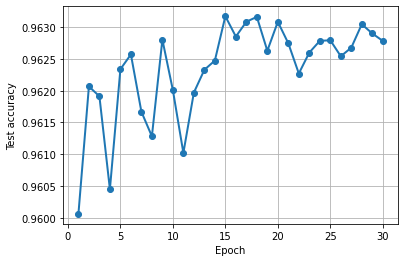

In [244]:
val_acc = hist.history['val_accuracy']
nepochs = len(val_acc)
plt.plot(np.arange(1,nepochs+1), val_acc, 'o-', linewidth=2)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')

We are also showing some other usefull metrics. 

Confusion Matrix


3227/3227 [==============================] - 4s 1ms/step


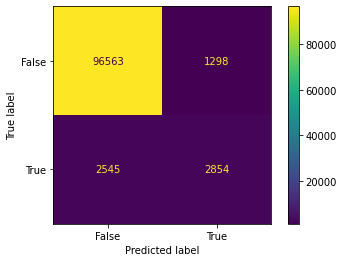

In [249]:
from sklearn import metrics
actual=yts
predicted=model.predict(Xts)
y_pred = np.round(predicted).tolist()
confusion_matrix = metrics.confusion_matrix(actual, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()


ROC Curves

In [251]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [253]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(yts, predicted)
print('AUC: %.2f' % auc)

AUC: 0.97


In [254]:
fpr, tpr, thresholds = roc_curve(yts, predicted)

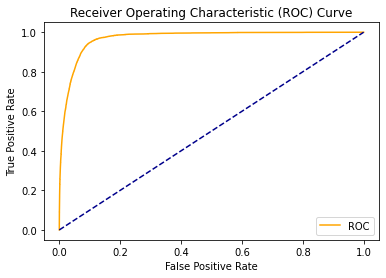

In [255]:
plot_roc_curve(fpr, tpr)